# Cyber Attack Detection in IoT

## Description of dataset

The CICIoT2023 dataset is available in two different formats: pcap, and csv.

#### Pcap: 
Files comprise the original data generated and collected in the CIC IoT network in different scenarios. These files contain all packets sent and can be used to extract and engineer other features. Furthermore.

#### Csv:
Files present a simpler way of loading and using the data. Those files are composed of features ext ..

## Table of contents

### 1 Introduction
### 2 Data collection
#### 2.1 Imports & Data sources
### 3 Exploratory Data Analysis(EDA)
### 4 Visualization
#### 4.1 Protocole type
#### 4.2 Magnitue Histogramme
#### 4.3 Variaince Histogramme
#### 4.4 Number Histogramme
#### 4.5 Box Plot & Scatter Plot
##### Box Plot
##### Scatter Plot
#### 4.6 Histogramme of the number of occurrences per label 1
#### 4.7 Box Plot of flow_duration by Attack Classes
#### 4.8 Number of Protocole for each label
#### 4.9 Protocol Distribution for Benign
#### 4.10 Countring the occurences for each unique label
#### 4.11 Protocol Distribution Analysis
#### 4.12 Balancing dataset
### 5 Data Preprocessing
#### 5.1 Data Cleaning
####   5.1.1 Missing values 
####   5.1.2 Duplicates
####   5.1.3 Removing Duplicates
#### 5.2 Feature Enginering
####   5.2.1 Feature Encoding
#####   5.2.1.1 Binary Encoding
#####   5.2.1.2 Label Encoding
####   5.2.2 Feature Scaling
#####   5.2.2.1 Standard Scaler
### 6 Model Selection
#### 6.1 Modelling of 33 classes(Random Forest Classifier & Logistic Regression)
#### 6.2 Modelling of 8 classes(Random Forest Classifier & Logistic Regression)
### 7 Conculsion

## 1 Introduction  
 With the proliferation of IoT devices in our daily environment, it has become essential to ensure the security
and protection of these devices against cyber-attacks. The consequences of such attacks can be very serious,
ranging from compromising users privacy to endangering critical infrastructures. Therefore, it is imperative to
develop effective detection systems to protect IoT devices and the networks they are connected to.

 The main goal of this research is to propose a novel and extensive IoT attack dataset to foster the development
of security analytics applications in real IoT operations. To accomplish this, 34 attacks are executed in an IoT .
These attacks are classified into seven categories, namely DDoS, DoS, Recon, Web-based, brute force, spoofing,
and Mirai. Finally, all attacks are executed by malicious IoT devices targeting other IoT devices.


## 2 Data Collection

### Import & Data sources
The import statement in programming serves to incorporate external libraries or modules into a script or program. It enables the inclusion of essential tools like Pandas for efficient data manipulation and Matplotlib for creating visualizations. Additionally, the Glob library proves valuable for file searching, employing filename patterns with wildcard characters.


In [ ]:

import pandas as pd
import glob

# Spécifie le chemin vers le dossier contenant tes fichiers CSV
dossier_datasets = "C:/Users/ZY LAPTOP/Desktop/dssi/Data preprocessing/CICIoT2023"

# Utilise la bibliothèque glob pour obtenir la liste de tous les fichiers CSV dans le dossier
fichiers_csv = glob.glob(f"{dossier_datasets}/*.csv")

# Initialise un DataFrame vide pour stocker toutes les données
df = pd.DataFrame()

# Boucle à travers tous les fichiers CSV et charge chaque fichier dans le DataFrame final
for fichier_csv in fichiers_csv:
    dataframe = pd.read_csv(fichier_csv)
    df = pd.concat([df, dataframe], ignore_index=True)

# Maintenant, df contient toutes les données de tous les fichiers CSV

# Spécifie le chemin où vous souhaitez enregistrer le fichier CSV final
chemin_sauvegarde_csv = "C:/Users/ZY LAPTOP/Desktop/dssi/Data preprocessing/neu\df.csv"


# Utilise la méthode to_csv pour enregistrer le DataFrame dans un fichier CSV
df.to_csv(chemin_sauvegarde_csv, index=False)

print("DataFrame enregistré avec succès dans", chemin_sauvegarde_csv)

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/ZY LAPTOP/Desktop/dssi/Data preprocessing/neu\df.csv')

## 3 Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is a critical phase in the data analysis process where the main goal is to gain insights into the characteristics of the dataset. EDA involves summarizing and visualizing the main features and patterns in the data, often using statistical and graphical methods. 

"df.shape" :In Exploratory Data Analysis (EDA), "shape" refers to the dimensions and structure of a dataset. It is typically represented as a tuple indicating the number of rows and columns. 

In [2]:
df.shape

(26961298, 47)

The code snippet df.head(20) is used to display the first 20 rows of a DataFrame named df. 

In [8]:
df.head(20)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,DDoS-SYN_Flood
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
5,0.000000,54.00,6.00,64.00,15.601720,15.601720,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298558e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
6,0.000000,0.00,47.00,64.00,50.370232,50.370232,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.368156e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
7,0.000000,52.92,5.88,62.72,1.647846,1.647846,0.0,0.0,0.0,0.0,...,0.280948,54.12,8.303726e+07,9.5,10.399519,0.398229,0.420059,0.19,141.55,DDoS-TCP_Flood
8,0.000000,54.00,6.00,64.00,26.856437,26.856437,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308997e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
9,0.267017,39248.00,17.00,64.00,3674.754748,3674.754748,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310663e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


The code df.tail() is used to display the last few rows of a DataFrame named df. 

In [4]:
df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
26961293,0.000000,54.00,6.00,64.00,3.049186,3.049186,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334449e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
26961294,0.000000,54.00,6.00,64.00,183.433732,183.433732,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331392e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
26961295,0.000785,56.29,6.11,64.00,306.952216,306.952216,0.0,0.0,1.0,0.0,...,0.140764,54.21,8.308883e+07,9.5,10.395538,0.200659,0.671167,0.03,141.55,DDoS-SYN_Flood
26961296,0.000901,72.09,6.11,64.64,158.475986,158.475986,0.0,0.0,0.0,0.0,...,2.450404,55.48,8.333177e+07,9.5,10.456522,3.475801,55.994224,0.17,141.55,DDoS-PSHACK_Flood
26961297,0.000000,0.00,1.00,64.00,1.291274,1.291274,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312453e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


The command df.info() is employed in data analysis using the Pandas library in Python to retrieve concise information about a DataFrame named df. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 26961298 entries, 0 to 26961297

Data columns (total 47 columns):

 #   Column           Dtype  

---  ------           -----  

 0   flow_duration    float64

 1   Header_Length    float64

 2   Protocol Type    float64

 3   Duration         float64

 4   Rate             float64

 5   Srate            float64

 6   Drate            float64

 7   fin_flag_number  float64

 8   syn_flag_number  float64

 9   rst_flag_number  float64

 10  psh_flag_number  float64

 11  ack_flag_number  float64

 12  ece_flag_number  float64

 13  cwr_flag_number  float64

 14  ack_count        float64

 15  syn_count        float64

 16  fin_count        float64

 17  urg_count        float64

 18  rst_count        float64

 19  HTTP             float64

 20  HTTPS            float64

 21  DNS              float64

 22  Telnet           float64

 23  SMTP             float64

 24  SSH              float64

 25  IRC              float64

 26  TCP      

The code df.describe() is used in data analysis with Pandas in Python to generate descriptive statistics of a DataFrame named df. 

In [6]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,...,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07,2.696130e+07
mean,5.735473e+00,7.678866e+04,9.063921e+00,6.635137e+01,9.075000e+03,9.075000e+03,5.768409e-06,8.654071e-02,2.073385e-01,9.046719e-02,...,1.246344e+02,3.332383e+01,1.246599e+02,8.318276e+07,9.498517e+00,1.312057e+01,4.709336e+01,3.073822e+04,9.642325e-02,1.415130e+02
std,2.853696e+02,4.619104e+05,8.943532e+00,1.402177e+01,9.960807e+04,9.960807e+04,8.215164e-03,2.811608e-01,4.054001e-01,2.868499e-01,...,2.408687e+02,1.603648e+02,2.414775e+02,1.704781e+07,8.191393e-01,8.626462e+00,2.268107e+02,3.255300e+05,2.329822e-01,2.106848e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091681e+00,2.091681e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.575463e+01,1.575463e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.051481e-01,2.817400e+02,1.430000e+01,6.400000e+01,1.174201e+02,1.174201e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.404928e+01,3.719096e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039671e+01,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02
max,3.943572e+05,9.907148e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.971522e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.358300e+04,1.238524e+04,1.358300e+04,1.676394e+08,1.500000e+01,1.648211e+02,1.755127e+04,1.549022e+08,1.000000e+00,2.446000e+02


The command df.columns is utilized in data analysis with Pandas in Python to retrieve the column names of a DataFrame named df. 

In [6]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

The expression df['label'] is used in Pandas to extract a specific column, often referred to as 'label', from a DataFrame named df. 

In [7]:
df['label']

0                    DDoS-SYN_Flood
1                    DDoS-TCP_Flood
2           DDoS-SynonymousIP_Flood
3                    DDoS-UDP_Flood
4                   DDoS-ICMP_Flood
                     ...           
24919109             DDoS-TCP_Flood
24919110           DDoS-RSTFINFlood
24919111           DDoS-RSTFINFlood
24919112            DDoS-ICMP_Flood
24919113              DoS-SYN_Flood
Name: label, Length: 24919114, dtype: object

The expression df['Protocol Type'] is used in Pandas to extract a specific column named 'Protocol Type' from a DataFrame, where df is the DataFrame. 


In [9]:
df['Protocol Type']

0            5.94
1            6.00
2            6.00
3           17.00
4            1.00
            ...  
26961293     6.00
26961294     6.00
26961295     6.11
26961296     6.11
26961297     1.00
Name: Protocol Type, Length: 26961298, dtype: float64

The expression df['Magnitude'] is used in Pandas to extract a specific column named 'Magnitude' from a DataFrame, where df is the DataFrame.

In [10]:
df['Magnitue']

0           10.393232
1           10.392305
2           10.392305
3           10.000000
4            9.165151
              ...    
26961293    10.392305
26961294    10.392305
26961295    10.395538
26961296    10.456522
26961297     9.165151
Name: Magnitue, Length: 26961298, dtype: float64

The expression df['Duration'] is used in Pandas to extract a specific column named 'Duration' from a DataFrame, where df is the DataFrame. 


In [12]:
df['Duration']

0           63.36
1           64.00
2           64.00
3           64.00
4           64.00
            ...  
26961293    64.00
26961294    64.00
26961295    64.00
26961296    64.64
26961297    64.00
Name: Duration, Length: 26961298, dtype: float64

This code performs a correlation analysis on numeric columns within a DataFrame named df. 

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


correlation_matrix

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
flow_duration,1.000000,0.010257,0.001535,0.042778,-0.001576,-0.001576,-1.291359e-05,-0.006109,-0.007983,-0.006074,...,0.008100,0.016351,0.007979,-0.000511,-0.000610,0.011540,0.016332,0.006754,0.064769,-5.951962e-04
Header_Length,0.010257,1.000000,0.047189,0.323006,-0.011462,-0.011462,-1.165865e-04,-0.050875,-0.084850,-0.052085,...,0.424332,0.327919,0.426541,0.001033,-0.000794,0.414318,0.327606,0.206907,0.267319,-8.276656e-04
Protocol Type,0.001535,0.047189,1.000000,-0.011804,0.018844,0.018844,-2.405797e-04,-0.105295,-0.174705,-0.107839,...,0.338693,-0.027240,0.337522,0.003449,-0.001259,0.450099,-0.027242,-0.021259,0.030480,-1.208514e-03
Duration,0.042778,0.323006,-0.011804,1.000000,-0.009088,-0.009088,-1.159865e-04,-0.049461,-0.077507,-0.039831,...,0.250902,0.341915,0.213889,0.001309,0.000218,0.236781,0.341678,0.208314,0.447186,1.854846e-04
Rate,-0.001576,-0.011462,0.018844,-0.009088,1.000000,1.000000,-5.837061e-05,0.002881,-0.031359,0.001865,...,-0.008201,-0.008191,-0.008259,0.000480,0.000023,-0.008829,-0.008181,-0.005313,-0.008080,1.499278e-05
Srate,-0.001576,-0.011462,0.018844,-0.009088,1.000000,1.000000,-5.837061e-05,0.002881,-0.031359,0.001865,...,-0.008201,-0.008191,-0.008259,0.000480,0.000023,-0.008829,-0.008181,-0.005313,-0.008080,1.499278e-05
Drate,-0.000013,-0.000117,-0.000241,-0.000116,-0.000058,-0.000058,1.000000e+00,-0.000216,0.001373,-0.000221,...,-0.000206,-0.000145,-0.000205,0.000007,0.000001,-0.000222,-0.000145,-0.000066,-0.000261,1.234416e-06
fin_flag_number,-0.006109,-0.050875,-0.105295,-0.049461,0.002881,0.002881,-2.161252e-04,1.000000,-0.157421,0.975654,...,-0.089211,-0.061080,-0.089059,0.002799,0.000235,-0.095866,-0.061033,-0.028034,-0.097365,2.344269e-04
syn_flag_number,-0.007983,-0.084850,-0.174705,-0.077507,-0.031359,-0.031359,1.372915e-03,-0.157421,1.000000,-0.161299,...,-0.146916,-0.100938,-0.146642,-0.000514,0.000315,-0.156037,-0.100863,-0.047242,-0.114334,3.085442e-04
rst_flag_number,-0.006074,-0.052085,-0.107839,-0.039831,0.001865,0.001865,-2.214502e-04,0.975654,-0.161299,1.000000,...,-0.090876,-0.061673,-0.090702,0.002694,0.000191,-0.097463,-0.061626,-0.028521,-0.088995,1.932254e-04


This code calculates the standard deviation for each numeric column in the DataFrame numeric_columns. Standard deviation is a statistical measure of the amount of variation or dispersion in a set of values. 

In [14]:
std = numeric_columns.std()
std

flow_duration      2.853696e+02
Header_Length      4.619104e+05
Protocol Type      8.943532e+00
Duration           1.402177e+01
Rate               9.960807e+04
Srate              9.960807e+04
Drate              8.215164e-03
fin_flag_number    2.811608e-01
syn_flag_number    4.054001e-01
rst_flag_number    2.868499e-01
psh_flag_number    2.829025e-01
ack_flag_number    3.289146e-01
ece_flag_number    1.106334e-03
cwr_flag_number    7.940611e-04
ack_count          2.863950e-01
syn_count          6.635789e-01
fin_count          3.287256e-01
urg_count          7.210036e+01
rst_count          3.259731e+02
HTTP               2.142436e-01
HTTPS              2.282992e-01
DNS                1.152077e-02
Telnet             0.000000e+00
SMTP               1.925882e-04
SSH                6.398899e-03
IRC                3.335725e-04
TCP                4.945227e-01
UDP                4.086654e-01
DHCP               1.348116e-03
ARP                8.181891e-03
ICMP               3.700959e-01
IPv     

This code calculates the mean (average) for each numeric column in the DataFrame numeric_columns. The mean is a measure of central tendency that represents the typical value of a set of numbers. 

In [15]:
mean = numeric_columns.mean()
mean

flow_duration      5.735473e+00
Header_Length      7.678866e+04
Protocol Type      9.063921e+00
Duration           6.635137e+01
Rate               9.075000e+03
Srate              9.075000e+03
Drate              5.768409e-06
fin_flag_number    8.654071e-02
syn_flag_number    2.073385e-01
rst_flag_number    9.046719e-02
psh_flag_number    8.773046e-02
ack_flag_number    1.234164e-01
ece_flag_number    1.223977e-06
cwr_flag_number    6.305334e-07
ack_count          9.051784e-02
syn_count          3.303724e-01
fin_count          9.902755e-02
urg_count          6.256887e+00
rst_count          3.854837e+01
HTTP               4.822605e-02
HTTPS              5.516355e-02
DNS                1.327458e-04
Telnet             0.000000e+00
SMTP               3.709020e-08
SSH                4.094758e-05
IRC                1.112706e-07
TCP                5.738059e-01
UDP                2.119156e-01
DHCP               1.817420e-06
ARP                6.694782e-05
ICMP               1.638021e-01
IPv     

This code computes the median for each numeric column in the DataFrame numeric_columns. The median is a measure of central tendency that represents the middle value of a dataset when arranged in ascending or descending order. 

In [16]:
median = numeric_columns.median()
median

flow_duration      0.000000e+00
Header_Length      5.400000e+01
Protocol Type      6.000000e+00
Duration           6.400000e+01
Rate               1.575463e+01
Srate              1.575463e+01
Drate              0.000000e+00
fin_flag_number    0.000000e+00
syn_flag_number    0.000000e+00
rst_flag_number    0.000000e+00
psh_flag_number    0.000000e+00
ack_flag_number    0.000000e+00
ece_flag_number    0.000000e+00
cwr_flag_number    0.000000e+00
ack_count          0.000000e+00
syn_count          0.000000e+00
fin_count          0.000000e+00
urg_count          0.000000e+00
rst_count          0.000000e+00
HTTP               0.000000e+00
HTTPS              0.000000e+00
DNS                0.000000e+00
Telnet             0.000000e+00
SMTP               0.000000e+00
SSH                0.000000e+00
IRC                0.000000e+00
TCP                1.000000e+00
UDP                0.000000e+00
DHCP               0.000000e+00
ARP                0.000000e+00
ICMP               0.000000e+00
IPv     

"df.max()" is used to returns the highest value in each column.

In [17]:
df.max()

flow_duration         394357.207374
Header_Length            9907147.75
Protocol Type                  47.0
Duration                      255.0
Rate                      8388608.0
Srate                     8388608.0
Drate                     29.715225
fin_flag_number                 1.0
syn_flag_number                 1.0
rst_flag_number                 1.0
psh_flag_number                 1.0
ack_flag_number                 1.0
ece_flag_number                 1.0
cwr_flag_number                 1.0
ack_count                       7.7
syn_count                     12.87
fin_count                    248.32
urg_count                    4401.7
rst_count                    9606.5
HTTP                            1.0
HTTPS                           1.0
DNS                             1.0
Telnet                          0.0
SMTP                            1.0
SSH                             1.0
IRC                             1.0
TCP                             1.0
UDP                         

"df.min()" is used to returns the lowest value in each column.

In [18]:
df.min()

flow_duration                   0.0
Header_Length                   0.0
Protocol Type                   0.0
Duration                        0.0
Rate                            0.0
Srate                           0.0
Drate                           0.0
fin_flag_number                 0.0
syn_flag_number                 0.0
rst_flag_number                 0.0
psh_flag_number                 0.0
ack_flag_number                 0.0
ece_flag_number                 0.0
cwr_flag_number                 0.0
ack_count                       0.0
syn_count                       0.0
fin_count                       0.0
urg_count                       0.0
rst_count                       0.0
HTTP                            0.0
HTTPS                           0.0
DNS                             0.0
Telnet                          0.0
SMTP                            0.0
SSH                             0.0
IRC                             0.0
TCP                             0.0
UDP                         

The df.count() command is used to obtain the count of non-null values in each column of a DataFrame named df. 

In [19]:
df.count()

flow_duration      26961298
Header_Length      26961298
Protocol Type      26961298
Duration           26961298
Rate               26961298
Srate              26961298
Drate              26961298
fin_flag_number    26961298
syn_flag_number    26961298
rst_flag_number    26961298
psh_flag_number    26961298
ack_flag_number    26961298
ece_flag_number    26961298
cwr_flag_number    26961298
ack_count          26961298
syn_count          26961298
fin_count          26961298
urg_count          26961298
rst_count          26961298
HTTP               26961298
HTTPS              26961298
DNS                26961298
Telnet             26961298
SMTP               26961298
SSH                26961298
IRC                26961298
TCP                26961298
UDP                26961298
DHCP               26961298
ARP                26961298
ICMP               26961298
IPv                26961298
LLC                26961298
Tot sum            26961298
Min                26961298
Max                2

In [12]:

import dask.dataframe as dd
import pandas as pd
from scipy.stats import zscore

# Suppose df is your pandas DataFrame
ddf = dd.from_pandas(df, npartitions=3)

# Convert non-numeric columns to NaN
ddf = ddf.map(pd.to_numeric, meta=df)

# Calculate z-scores for each column independently
z_scores = ddf.map_partitions(lambda partition: partition.apply(zscore, axis=0), meta=df)

# Define the threshold for outlier detection
threshold = 3

# Identify outliers based on z-scores
outliers = z_scores.apply(lambda x: (x > threshold) | (x < -threshold), axis=0)

# Invert the condition to get non-outliers
non_outliers = ~outliers

# Filter the original DataFrame to keep only non-outliers
df_no_outliers = ddf.loc[non_outliers]

# Persist the result to materialize the computation
df_no_outliers = df_no_outliers.persist()

# Compute and display the result without outliers
result_no_outliers = df_no_outliers.compute()
print('DataFrame sans outliers:', result_no_outliers)

# Display the outliers (rows and columns)
outliers_result = outliers.compute()
print('Outliers:')
print(outliers_result)


NotImplementedError: DataFrame.map requires pandas>=2.1.0, but pandas=2.0.3 is installed.

## 4 Visualization

### 4.1 Protocol Type
The histogram depicts the frequency distribution of different protocol types in the dataset. Each bar in the histogram represents a protocol type, and the height of the bar corresponds to the number of occurrences of that specific protocol type. This visualization helps to understand the relative prevalence of each protocol type in the dataset.

In [ ]:

#visualisation
import matplotlib.pyplot as plt
df['Protocol Type'].plot(kind='hist',title='Protocol type')

<Axes: title={'center': 'TCP'}, ylabel='Frequency'>

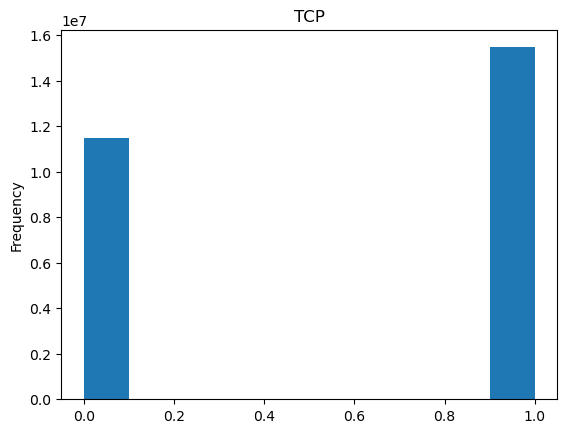

In [28]:

df['TCP'].plot(kind='hist',title='TCP')

In this code we creates a histogram to visualize the distribution of values in the 'Number' column of the DataFrame 'df'. 
So the histogram illustrates the frequency distribution of values in the 'Number' column. Each bar in the histogram represents a range or bin of values, and the height of the bar corresponds to the number of occurrences of values within that bin.

<Axes: title={'center': 'protocole type'}, xlabel='Protocol Type', ylabel='Duration'>

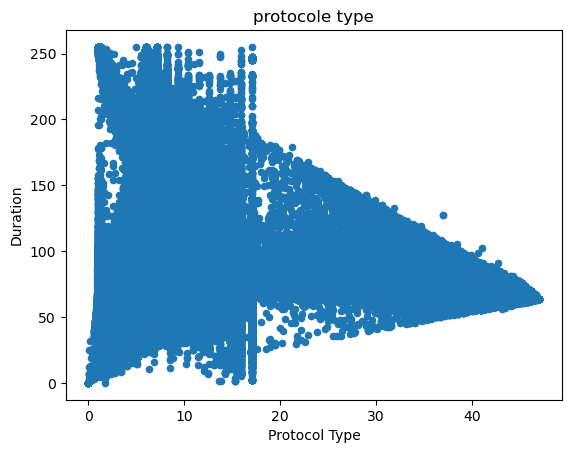

In [32]:
df.plot(kind='scatter',x='Protocol Type',y='Duration',title='protocole type')

<Axes: title={'center': 'protocole type'}, xlabel='Number', ylabel='Duration'>

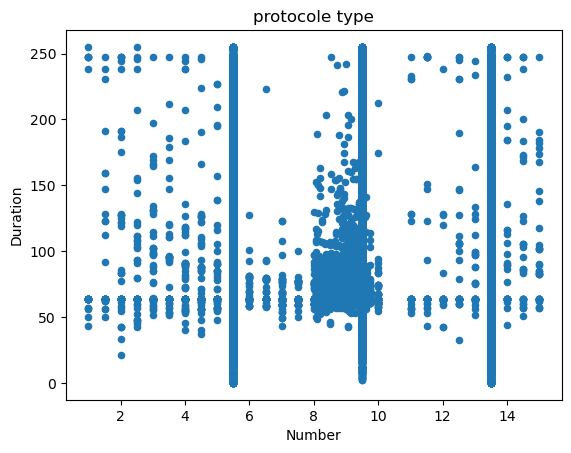

In [33]:
df.plot(kind='scatter',x='Number',y='Duration',title='Number')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'DDoS-SYN_Flood'),
  Text(1, 0, 'DDoS-TCP_Flood'),
  Text(2, 0, 'DDoS-SynonymousIP_Flood'),
  Text(3, 0, 'DDoS-UDP_Flood'),
  Text(4, 0, 'DDoS-ICMP_Flood'),
  Text(5, 0, 'DoS-SYN_Flood'),
  Text(6, 0, 'Mirai-greeth_flood'),
  Text(7, 0, 'DDoS-PSHACK_Flood'),
  Text(8, 0, 'DDoS-RSTFINFlood'),
  Text(9, 0, 'Mirai-greip_flood'),
  Text(10, 0, 'Mirai-udpplain'),
  Text(11, 0, 'BenignTraffic'),
  Text(12, 0, 'DoS-TCP_Flood'),
  Text(13, 0, 'DoS-UDP_Flood'),
  Text(14, 0, 'DNS_Spoofing'),
  Text(15, 0, 'MITM-ArpSpoofing'),
  Text(16, 0, 'Recon-OSScan'),
  Text(17, 0, 'Recon-HostDiscovery'),
  Text(18, 0, 'DDoS-ACK_Fragmentation'),
  Text(19, 0, 'DDoS-ICMP_Fragmentation'),
  Text(20, 0, 'VulnerabilityScan'),
  Text(21, 0, 'DDoS-UDP_Fragmentation'),
  Text(22, 0, 'Recon-PortScan'),
  Text(

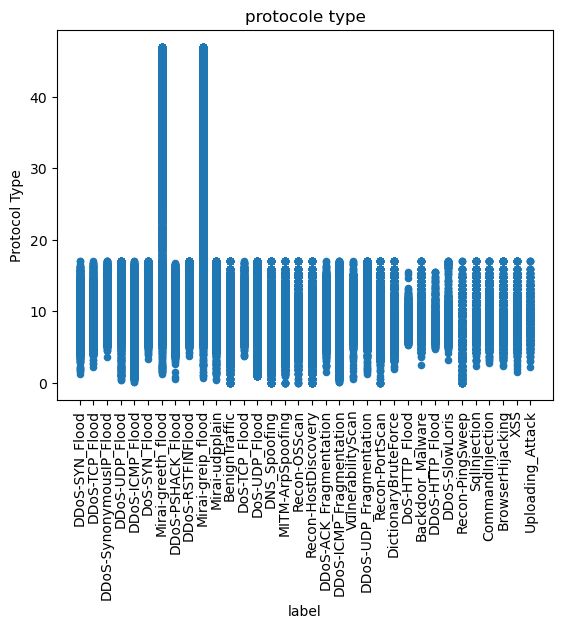

In [5]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='label',y='Protocol Type',title='protocole type')
plt.xticks(rotation=90 )

### 4.2 Magnitue Histogramme

Now we create a histogram for the 'Magnitude' column in the DataFrame df. 
This histogram illustrates the frequency distribution of values in the 'Magnitude' column. Each bar in the histogram represents a range or bin of values, and the height of the bar corresponds to the number of occurrences of values within that bin.

<Axes: title={'center': 'Magnitue'}, ylabel='Frequency'>

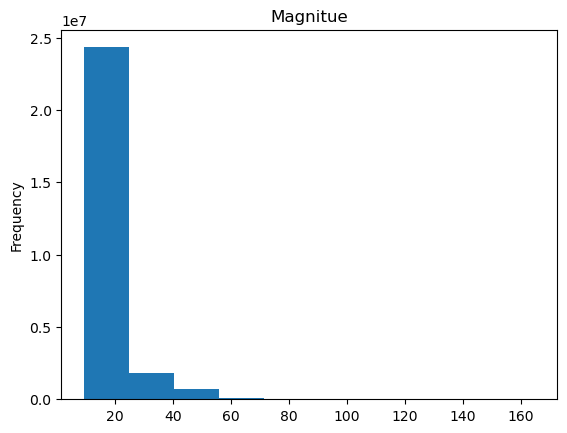

In [30]:
df['Magnitue'].plot(kind='hist',title='Magnitue')

### 4.3 Variance Histogrammme

In this part of code we create a histogram for the 'Variance' column in the DataFrame 'df'. 

The histogram illustrates the frequency distribution of values in the 'Variance' column. Each bar in the histogram represents a range or bin of values, and the height of the bar corresponds to the number of occurrences of values within that bin.

<Axes: title={'center': 'Variance'}, ylabel='Frequency'>

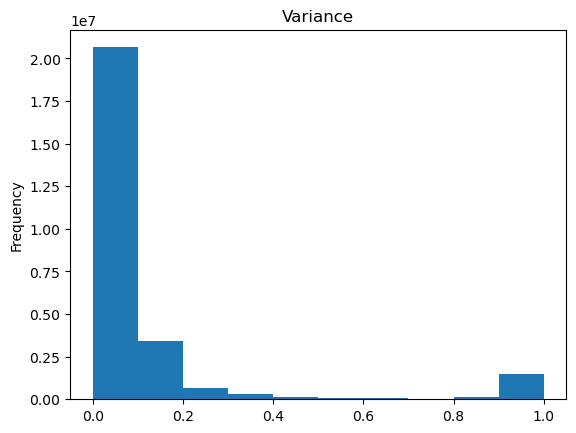

In [31]:
df['Variance'].plot(kind='hist',title='Variance')

### 4.4 Number Histogramme

In the following code we create a histogram to visualize the distribution of values in the 'Number' column of the DataFrame 'df'.

This histogram illustrates the frequency distribution of values in the 'Number' column. Each bar in the histogram represents a range or bin of values, and the height of the bar corresponds to the number of occurrences of values within that bin.

<Axes: title={'center': 'Number'}, ylabel='Frequency'>

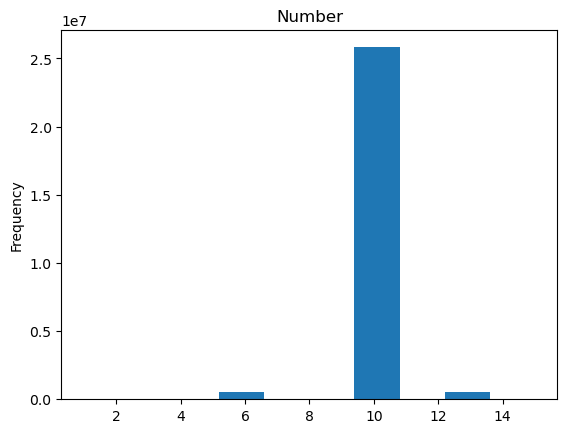

In [29]:
import matplotlib.pyplot as plt
df['Number'].plot(kind='hist',title='Number')

### 4.5 Box Plot & Scatter Plot
The following representation includes two plots: a boxplot and a scatter plot.
#### 4.5.1 Box plot:
The boxplot is designed to provide a visual summary of the distribution of each numerical feature in the DataFrame 'df',Each box in the plot represents the interquartile range (IQR) of a numerical column. The line inside the box represents the median and The outliers, or data points that fall significantly outside the typical range, can be identified as individual points outside the "whiskers" of the boxes.
#### 4.5.2 Scatter plot:
The scatter plot aims to visualize the relationship between the 'label' and 'Protocol Type' columns in the DataFrame df.
Each point in the scatter plot represents an observation in the dataset, with the x-coordinate corresponding to the 'label' values and the y-coordinate to the 'Protocol Type' values,The x-axis represents the 'Label' column, and the y-axis represents the 'Protocol Type' column.

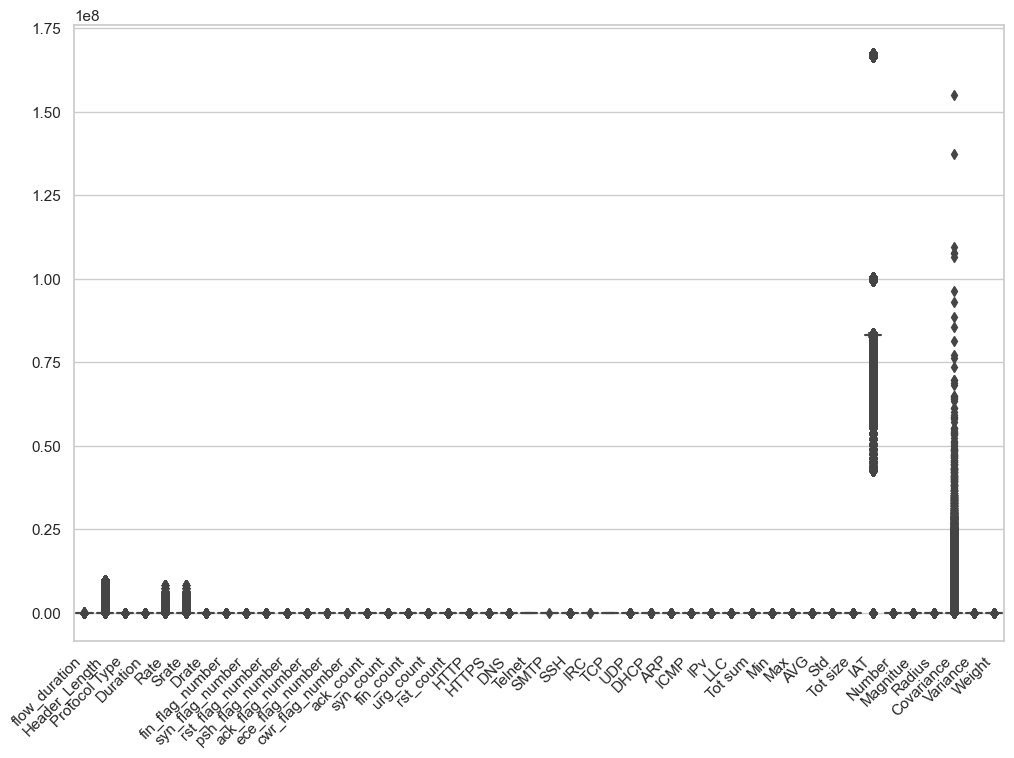

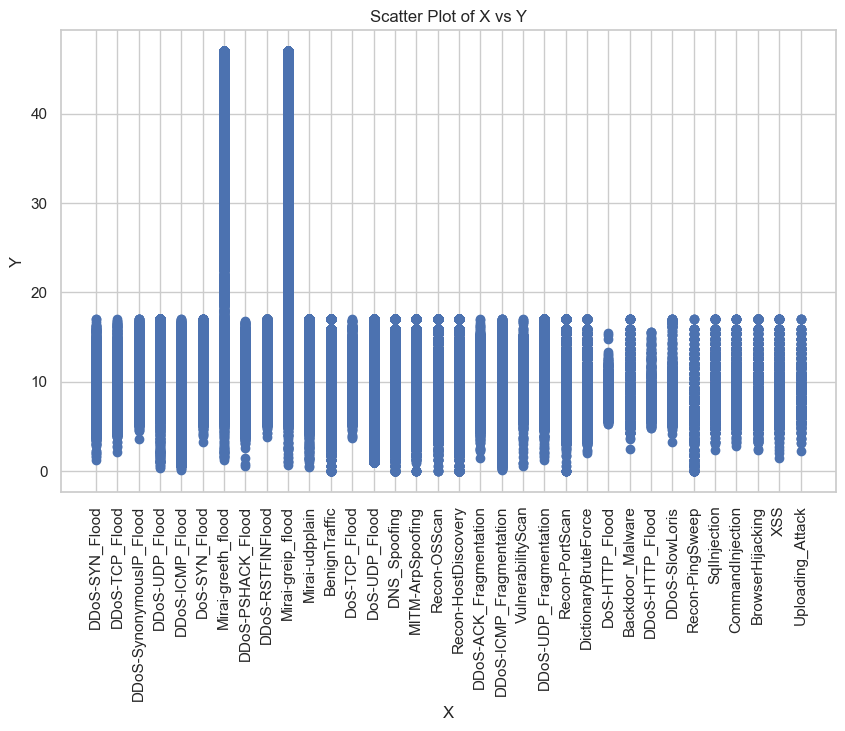

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose df is your pandas DataFrame
sns.set(style="whitegrid")

# Create a box plot for each column
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df['label'], df['Protocol Type'])
plt.xlabel('Label')
plt.xticks(rotation=90 )
plt.ylabel('Protocol')
plt.title('Scatter Plot of Label vs Protocols')
plt.show()

### 4.6 Histogramme of the number of occurrences per label 1
This histogram provides a visual representation of how frequently each label occurs in the dataset,Each bar represents a unique label, and the height of the bar indicates the number of occurrences of that label.
The histogram helps identify the distribution and relative frequencies of different labels in the dataset.

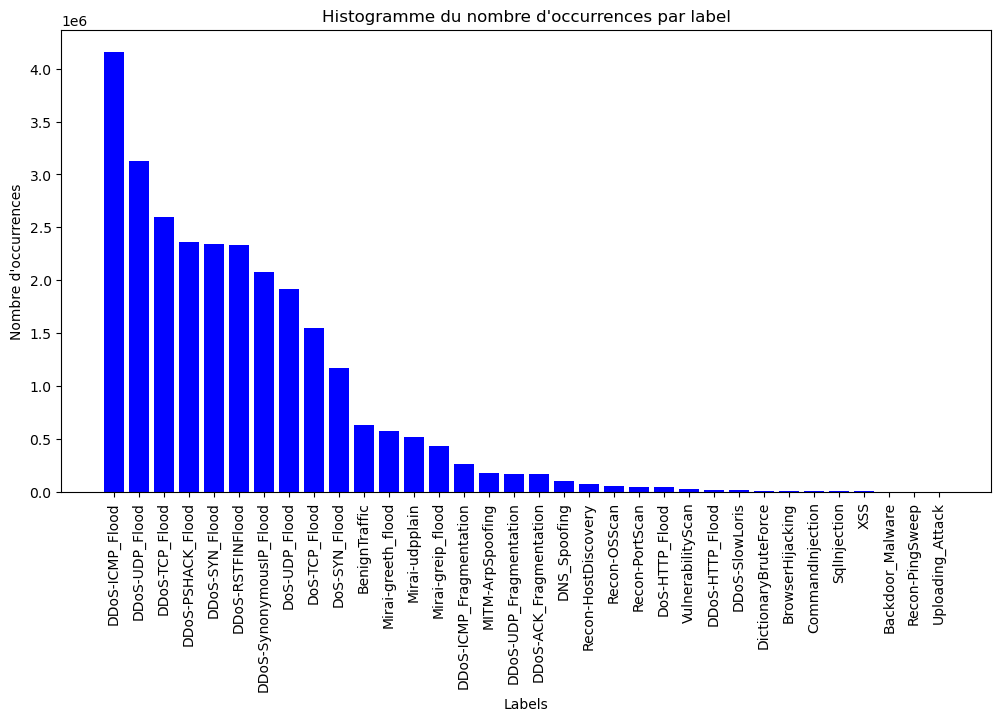

In [52]:
import matplotlib.pyplot as plt


# Supposons que votre DataFrame s'appelle df

# Obtenir le nombre d'occurrences pour chaque label
occurrences = df['label'].value_counts()

# Créer un histogramme
plt.figure(figsize=(12, 6))
plt.bar(occurrences.index, occurrences.values, color='blue')
plt.title('Histogramme du nombre d\'occurrences par label')
plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=90 )  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


### Histogram of the number of occurrences per label 2

In this histogram we visualize the distribution of occurrences for each unique label in the 'label' column of the DataFrame 'df',and this histogram provides a quick overview of how frequently each label appears in the dataset.Where each bar in the histogram corresponds to a unique label, and the height of the bar represents the number of occurrences of that label.

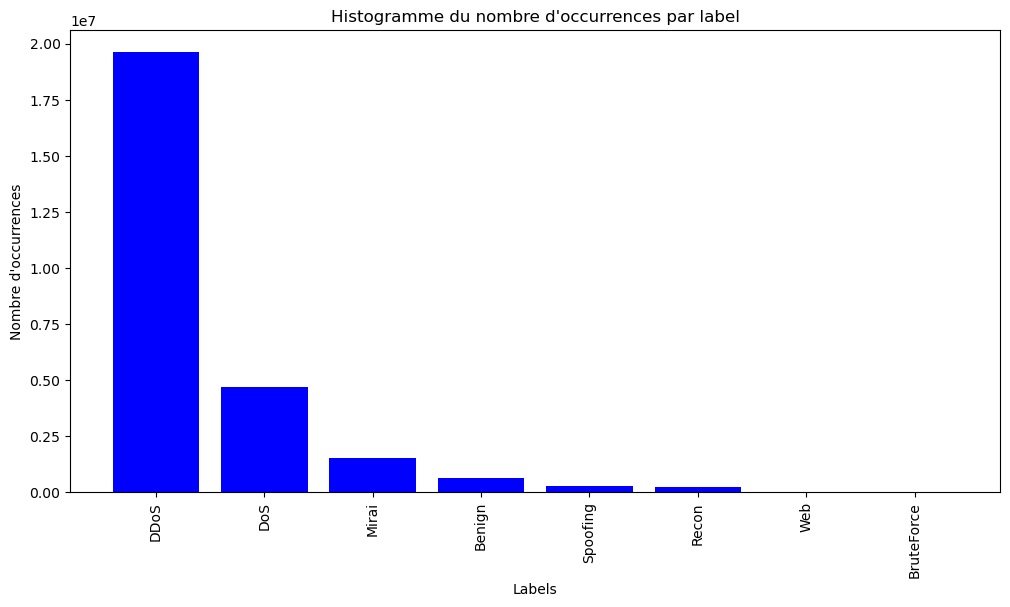

In [26]:
occurrences = df['label'].value_counts()

# Créer un histogramme
plt.figure(figsize=(12, 6))
plt.bar(occurrences.index, occurrences.values, color='blue')
plt.title('Histogramme du nombre d\'occurrences par label')
plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=90 )  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


### 4.7 Box Plot of flow_duration by Attack Classes

The box plot visualizes the distribution of the 'flow_duration' variable across different attack classes in the DataFrame df.
Each box in the plot represents the interquartile range (IQR) of the 'flow_duration' values for a specific attack class. The line inside the box represents the median.

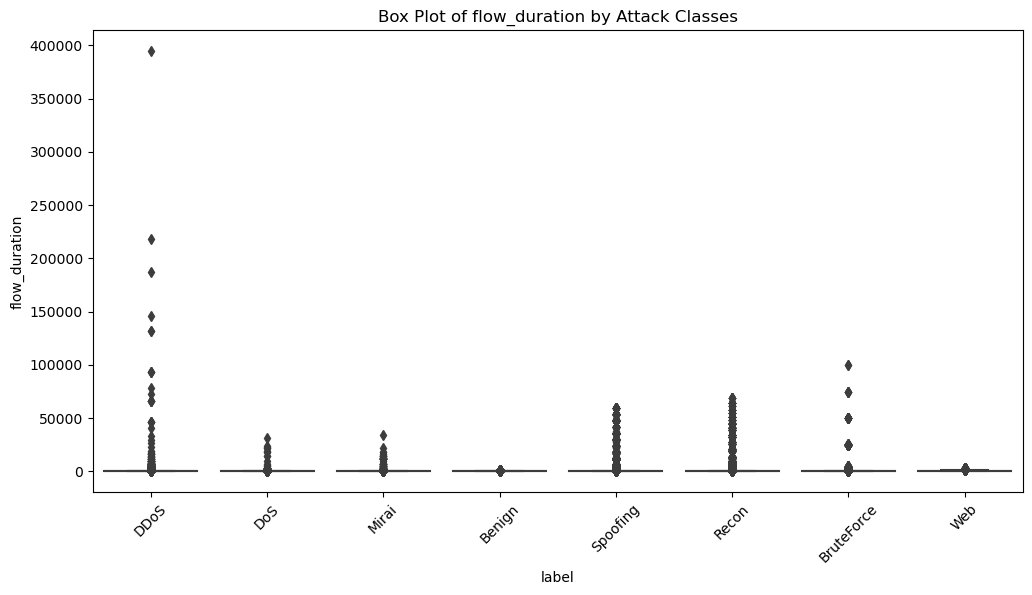

In [55]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='flow_duration', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of flow_duration by Attack Classes')
plt.xlabel('label')
plt.ylabel('flow_duration');

### 4.8 Number of Protocols for Each Label

The bar plot visualizes the count of protocols for each label in the DataFrame 'protocols_counts',The bar plot is created with each bar representing the count of protocols for a specific label.

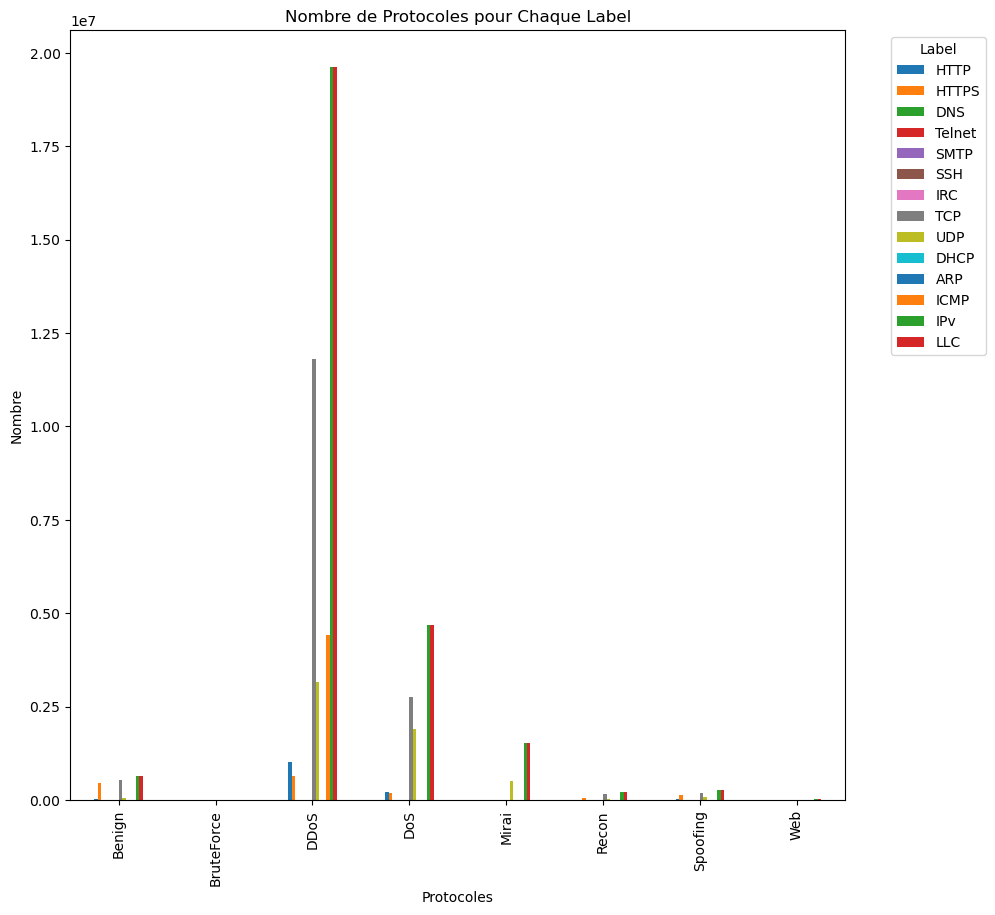

In [60]:
protocols_counts = protocols_counts.T

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
protocols_counts.plot(kind='bar', ax=ax)
plt.title('Nombre de Protocoles pour Chaque Label')
plt.xlabel('Protocoles')
plt.ylabel('Nombre')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 4.9 Protocol Distribution for Benign
In this code we generates a set of subplots, each illustrating the distribution of protocols for a specific label in the DataFrame 'protocols_counts'. 
For each row (label) in protocols_counts, a separate subplot is created to visualize the distribution of protocols for that label, Each subplot contains a bar plot where each bar represents a protocol, and the height of the bar corresponds to the count of occurrences of that protocol.

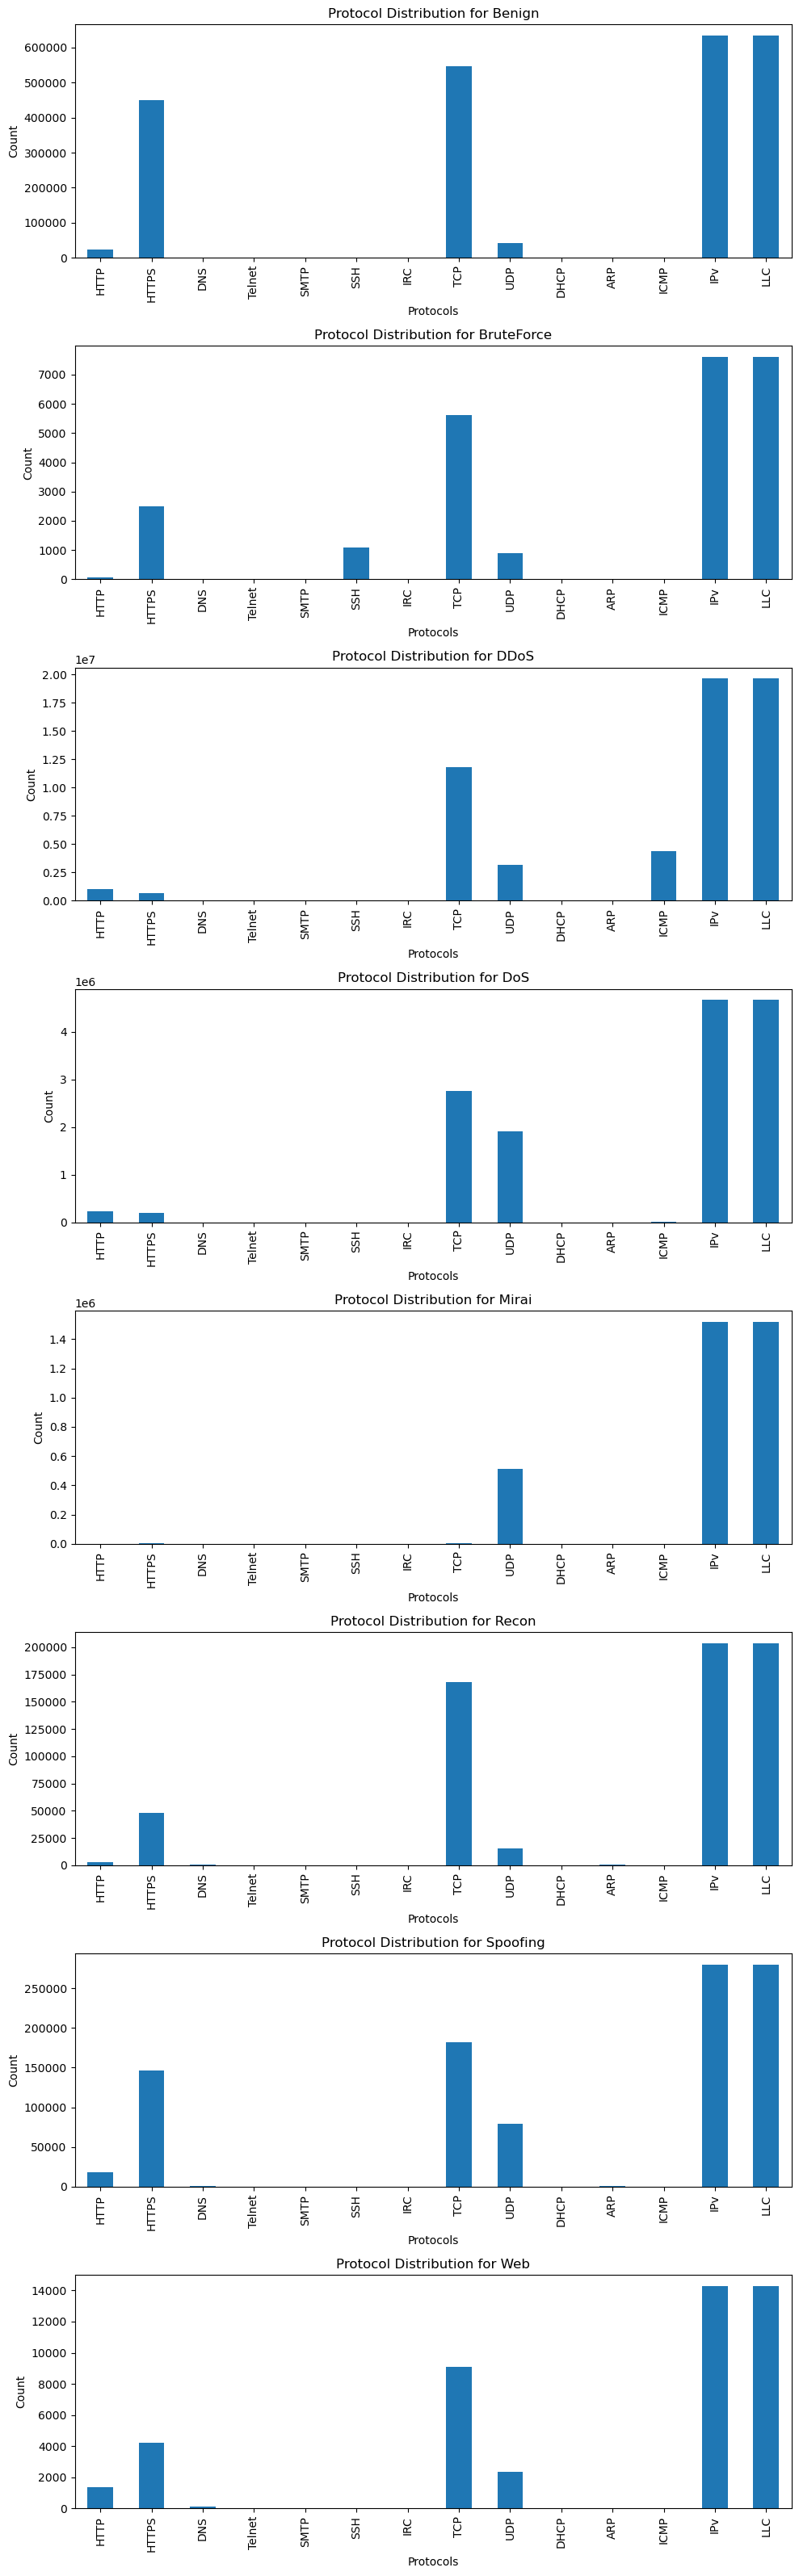

In [64]:
fig, axes = plt.subplots(nrows=len(protocols_counts), ncols=1, figsize=(10, 4 * len(protocols_counts)))

for index, (label, protocol_counts) in enumerate(protocols_counts.iterrows()):
    ax = axes[index]
    protocol_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Protocol Distribution for {label}')
    ax.set_xlabel('Protocols')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

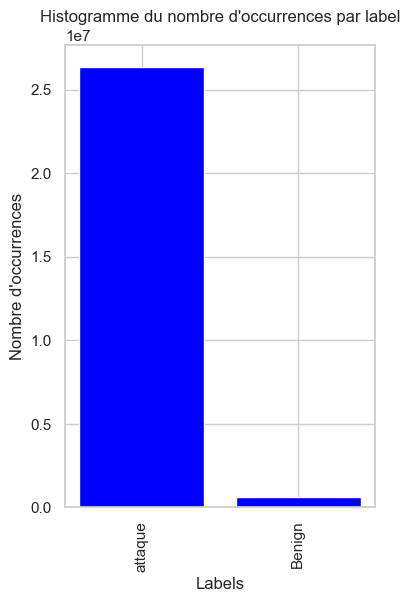

In [20]:
occurrences = df['label'].value_counts()

# Créer un histogramme
plt.figure(figsize=(4, 6))
plt.bar(occurrences.index, occurrences.values, color='blue')
plt.title('Histogramme du nombre d\'occurrences par label')
plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=90 )  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

### 4.10 Counting Occurrences of Each Unique Label.
In the following code label_counts = df['label'].value_counts() computes and stores the count of occurrences for each unique value in the 'label' column of the DataFrame df.
For each unique label, the count indicates how many times that specific label appears in the 'label' column of the DataFrame.

In [3]:
label_counts = df['label'].value_counts()
print(label_counts)


label

DDoS-ICMP_Flood            4160121

DDoS-UDP_Flood             3126572

DDoS-TCP_Flood             2597167

DDoS-PSHACK_Flood          2364254

DDoS-SYN_Flood             2344937

DDoS-RSTFINFlood           2335298

DDoS-SynonymousIP_Flood    2077880

DoS-UDP_Flood              1915457

DoS-TCP_Flood              1543307

DoS-SYN_Flood              1170804

BenignTraffic               634361

Mirai-greeth_flood          573147

Mirai-udpplain              514374

Mirai-greip_flood           433117

DDoS-ICMP_Fragmentation     261438

MITM-ArpSpoofing            177626

DDoS-UDP_Fragmentation      165130

DDoS-ACK_Fragmentation      164732

DNS_Spoofing                103186

Recon-HostDiscovery          77432

Recon-OSScan                 56609

Recon-PortScan               47901

DoS-HTTP_Flood               41386

VulnerabilityScan            21775

DDoS-HTTP_Flood              16640

DDoS-SlowLoris               13420

DictionaryBruteForce          7621

BrowserHijacking     

### 4.11 Protocol Distribution Analysis

The resulting table provides insights into the distribution of protocols across different labels. It reveals how frequently each protocol appears for specific classes or labels.

In [58]:
import pandas as pd

# Supposons que votre dataframe s'appelle df
# et que vous avez déjà chargé vos données dans le dataframe

# Compter le nombre de protocoles pour chaque label
protocols_columns = ["HTTP", "HTTPS", "DNS", "Telnet", "SMTP", "SSH", "IRC", "TCP", "UDP", "DHCP", "ARP", "ICMP", "IPv", "LLC"]
protocols_counts = df.groupby('label')[protocols_columns].sum()

# Afficher les résultats
print(protocols_counts)


                 HTTP     HTTPS     DNS  Telnet  SMTP     SSH  IRC  \

label                                                                

Benign        24483.0  449041.0  1280.0     0.0   0.0     0.0  0.0   

BruteForce       55.0    2495.0     7.0     0.0   0.0  1100.0  0.0   

DDoS        1027216.0  640261.0   109.0     0.0   0.0     0.0  0.0   

DoS          224908.0  193031.0    75.0     0.0   0.0     0.0  0.0   

Mirai          1031.0    3562.0   936.0     0.0   0.0     0.0  0.0   

Recon          3187.0   48252.0   587.0     0.0   1.0     4.0  3.0   

Spoofing      18012.0  146422.0   498.0     0.0   0.0     0.0  0.0   

Web            1345.0    4217.0    87.0     0.0   0.0     0.0  0.0   



                   TCP        UDP  DHCP    ARP       ICMP         IPv  \

label                                                                   

Benign        545669.0    43040.0   0.0  161.0        8.0    633928.0   

BruteForce      5603.0      894.0   0.0    6.0        0.0      759

### 4.12 Balancing the Dataset 

The following code attempts to balance the dataset by selecting a fixed number (n = 10000) of samples from each class. 
So the result shows us an equal distribution of samples for each class, with each class contributing exactly n samples to the balanced dataset.

In [5]:
n = 10000

# taking n samples from each class
sampled_df = scaled_df.groupby('label', group_keys=False).apply(lambda x: x.head(n))

sampled_df.value_counts('label')

label
Benign        10000
DDoS          10000
DoS           10000
Mirai         10000
Recon         10000
Spoofing      10000
Web           10000
BruteForce     7621
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop('label', axis=1), sampled_df['label'], test_size=0.2, random_state=42)                                                          # Benign


In this part of codes the result provides an overview of the distribution of the different attack classes and the 'Benign' class in the 'label' column after the remapping process.

In [16]:
remap = {
    'DDoS': 'attaque',
    'DoS': 'attaque',
    'Mirai': 'attaque',
    'Recon': 'attaque',
    'Spoofing': 'attaque',
    'Web': 'attaque',
    'BruteForce': 'attaque',
    'Benign': 'Benign'
}

# Appliquer la transformation en vérifiant si la clé existe
df['label'] = df['label'].apply(lambda x: remap.get(x, x))

# Afficher les comptes
label_counts = df['label'].value_counts()
print(label_counts)


label

attaque    26326937

Benign       634361

Name: count, dtype: int64


In [24]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,feature
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,attaque,1
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,attaque,1
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,attaque,1
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,attaque,1
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,attaque,1


In [2]:
remap_labels = {
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Recon-PingSweep': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'VulnerabilityScan': 'Recon',
    'Recon-HostDiscovery': 'Recon',
    'DNS_Spoofing': 'Spoofing',
    'MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign',
    'BrowserHijacking': 'Web',
    'Backdoor_Malware': 'Web',
    'XSS': 'Web',
    'Uploading_Attack': 'Web',
    'SqlInjection': 'Web',
    'CommandInjection': 'Web',
    'DictionaryBruteForce': 'BruteForce'
}
df['label'] = df['label'].apply(lambda x : remap_labels[x])

df['label'].value_counts()

label
DDoS          19627589
DoS            4670954
Mirai          1520638
Benign          634361
Spoofing        280812
Recon           204998
Web              14325
BruteForce        7621
Name: count, dtype: int64

## 5 Data Preprocessing

### 5.1 Data Cleaning
In data cleaning, the goal is to detect and rectify these errors to ensure that the data accurately represents the real-world phenomena it intends to capture. For this stage, we will follow this checklist :

### 5.1.1 Missing values

"df.isnull()" is used to checks for null values , returns boolean array

In [20]:
df.isnull()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26961293,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26961294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26961295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26961296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The df.isnull().sum() command is employed to calculate the sum of missing values (null values) in each column of a DataFrame named df. 

In [21]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

### 5.1.2 Duplicates

The df.duplicated() command is used to identify duplicate rows in a DataFrame named df. 

In [22]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
26961293    False
26961294    False
26961295    False
26961296    False
26961297    False
Length: 26961298, dtype: bool

The df.duplicated().sum() command is employed to calculate the total number of duplicate rows in a DataFrame named df.

In [23]:
df.duplicated().sum()

11

### 5.1.3 Removing duplicates

The df.drop_duplicates() command is used to remove duplicate rows from a DataFrame named df.

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

### 5.2 Feature Engenering

### 5.2.1 Feature Encoding

#### 5.2.1.1 Binary Encoding

In this code we add a new column named "feature" to the DataFrame 'df', where each row is assigned the value 1 if the corresponding "label" is "attaque" and 0 if it is "normal." 

In [23]:
import pandas as pd

# Supposez que votre dataframe s'appelle df et que la colonne "label" contient les valeurs "attaque" et "normal"
# Créez une nouvelle colonne "feature" avec l'encodage
df['feature'] = df['label'].apply(lambda x: 1 if x == 'attaque' else 0 )

# Visualisez la nouvelle colonne
print(df[['label', 'feature']])


            label  feature

0         attaque        1

1         attaque        1

2         attaque        1

3         attaque        1

4         attaque        1

...           ...      ...

26961293  attaque        1

26961294  attaque        1

26961295  attaque        1

26961296  attaque        1

26961297  attaque        1



[26961298 rows x 2 columns]


#### 5.2.1.2 Label Endcoding

For the following code we utilize the 'LabelEncoder' from the scikit-learn library to transform the categorical values in the 'label' column of the DataFrame 'sampled_df' into numerical labels.
The numerical labels are assigned in a way that preserves the original order of categories. Each unique category in the 'label' column is mapped to a specific integer.

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sampled_df['label'] = label_encoder.fit_transform(sampled_df['label'])

sampled_df.value_counts('label')

label
15    10000
16    10000
32    10000
27    10000
26    10000
25    10000
24    10000
23    10000
22    10000
21    10000
20    10000
19    10000
18    10000
1     10000
29    10000
14    10000
13    10000
12    10000
11    10000
10    10000
9     10000
8     10000
7     10000
6     10000
5     10000
4     10000
17     7621
2      3393
3      3132
30     2973
33     2213
0      1880
28     1281
31      734
Name: count, dtype: int64

### 5.2.2 Feature scaling

#### 5.2.2.1 Standard Scaler

Standardization is the process of rescaling features by removing the mean and scaling to unit variance.

In this code the StandardScaler is applied to the features of a DataFrame ('df') excluding the 'label' column.The resulting scaled features are then concatenated with the 'label' column, creating a new DataFrame named scaled_df. The scaled_df.info() command provides information about the data types and memory usage of the DataFrame after the standardization process.

In [3]:
from sklearn.preprocessing import StandardScaler, RobustScaler

features = df.drop('label', axis=1)
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_df = pd.concat([scaled_features, df['label']], axis=1)



scaled_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 26961298 entries, 0 to 26961297

Data columns (total 47 columns):

 #   Column           Dtype  

---  ------           -----  

 0   flow_duration    float64

 1   Header_Length    float64

 2   Protocol Type    float64

 3   Duration         float64

 4   Rate             float64

 5   Srate            float64

 6   Drate            float64

 7   fin_flag_number  float64

 8   syn_flag_number  float64

 9   rst_flag_number  float64

 10  psh_flag_number  float64

 11  ack_flag_number  float64

 12  ece_flag_number  float64

 13  cwr_flag_number  float64

 14  ack_count        float64

 15  syn_count        float64

 16  fin_count        float64

 17  urg_count        float64

 18  rst_count        float64

 19  HTTP             float64

 20  HTTPS            float64

 21  DNS              float64

 22  Telnet           float64

 23  SMTP             float64

 24  SSH              float64

 25  IRC              float64

 26  TCP      

In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

df.value_counts('label')

label
6     4160121
14    3126572
13    2597167
8     2364254
10    2344937
9     2335298
12    2077880
21    1915457
20    1543307
19    1170804
1      634361
23     573147
25     514374
24     433117
7      261438
22     177626
15     165130
4      164732
16     103186
26      77432
27      56609
29      47901
18      41386
32      21775
5       16640
11      13420
17       7621
2        3393
3        3132
30       2973
33       2213
0        1880
28       1281
31        734
Name: count, dtype: int64

In [3]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,10
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,12
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

df.value_counts('label')

label
2    19627589
3     4670954
4     1520638
0      634361
6      280812
5      204998
7       14325
1        7621
Name: count, dtype: int64

In [9]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,53.46,5.94,63.36,1.145800,1.145800,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309402e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,2
1,0.000000,54.00,6.00,64.00,1.027823,1.027823,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307159e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,2
2,2.204616,93.96,6.00,64.00,0.671213,0.671213,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,2
3,0.053618,12497.00,17.00,64.00,47647.897124,47647.897124,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310693e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,2
4,0.000000,0.00,1.00,64.00,0.667744,0.667744,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314933e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,2


In this code we addresse the issue of class imbalance in a dataset ('scaled_df') by creating a more balanced sample.

In [3]:
# Dataset is imbalanced. Picking n samples from each class in a crude attempt to balance it.

n = 10000

# taking n samples from each class
sampled_df = scaled_df.groupby('label', group_keys=False).apply(lambda x: x.head(n))

sampled_df.value_counts('label')


label
DDoS-UDP_Fragmentation     10000
DNS_Spoofing               10000
VulnerabilityScan          10000
Recon-OSScan               10000
Recon-HostDiscovery        10000
Mirai-udpplain             10000
Mirai-greip_flood          10000
Mirai-greeth_flood         10000
MITM-ArpSpoofing           10000
DoS-UDP_Flood              10000
DoS-TCP_Flood              10000
DoS-SYN_Flood              10000
DoS-HTTP_Flood             10000
BenignTraffic              10000
Recon-PortScan             10000
DDoS-UDP_Flood             10000
DDoS-TCP_Flood             10000
DDoS-SynonymousIP_Flood    10000
DDoS-SlowLoris             10000
DDoS-SYN_Flood             10000
DDoS-RSTFINFlood           10000
DDoS-PSHACK_Flood          10000
DDoS-ICMP_Fragmentation    10000
DDoS-ICMP_Flood            10000
DDoS-HTTP_Flood            10000
DDoS-ACK_Fragmentation     10000
DictionaryBruteForce        7621
BrowserHijacking            3393
CommandInjection            3132
SqlInjection                2973
XSS 

In [19]:

binary_classifier = True
group_classifier = False
individual_classifier = False
dict_2_classes = {  0: 0 ,                                                                                                                                      # Benign
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS  
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai 
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}           
if group_classifier:
    print("Group 8 Class Classifier...")
    # Map y column to the dict_7_classes values
    df['label'] = df['label'].map(dict_8_classes)
    class_size = "8"
        
elif binary_classifier:
    print("Binary 2 Class Classifier...")
    # Map y column to the dict_2_classes values
    df['label'] = df['label'].map(dict_2_classes)
    class_size = "2"

else:
    print ("Individual 34 Class classifier...")
    class_size = "34"


Binary 2 Class Classifier...


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop('label', axis=1), sampled_df['label'], test_size=0.2, random_state=42)                                                          # Benign


In [6]:
def get_perf_metrics(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_pred, y_test, average='macro')
    precision = precision_score(y_pred, y_test, average='macro')
    f1 = f1_score(y_pred, y_test, average='macro')
    
    return [accuracy, recall, precision, f1]

## 6 Model Selection

### 6.1 Modelling of 33 classes(Random Forest Classifier & Logistic Regression)


#### 6.1.1 Random Forest Classifier

In this step we make model selection Rnadom forest , we use the following code wich trains a Random Forest classifier on a given dataset, analyzes feature importances, visualizes them in a bar chart, and evaluates the model's performance on a test set. 

            Feature    Importance

39              IAT  2.040966e-01

1     Header_Length  5.514665e-02

2     Protocol Type  4.813402e-02

38         Tot size  4.017587e-02

18        rst_count  3.895980e-02

35              Max  3.859477e-02

41         Magnitue  3.845457e-02

0     flow_duration  3.785139e-02

36              AVG  3.718301e-02

15        syn_count  3.685538e-02

33          Tot sum  3.208216e-02

17        urg_count  3.189924e-02

34              Min  3.181785e-02

5             Srate  2.757298e-02

4              Rate  2.752313e-02

44         Variance  2.188171e-02

14        ack_count  2.045859e-02

42           Radius  1.956263e-02

43       Covariance  1.934272e-02

37              Std  1.911089e-02

30             ICMP  1.878365e-02

3          Duration  1.813790e-02

7   fin_flag_number  1.722242e-02

8   syn_flag_number  1.663600e-02

16        fin_count  1.627563e-02

45           Weight  1.426104e-02

40           Number  1.407762e-02

10  psh_flag_number 

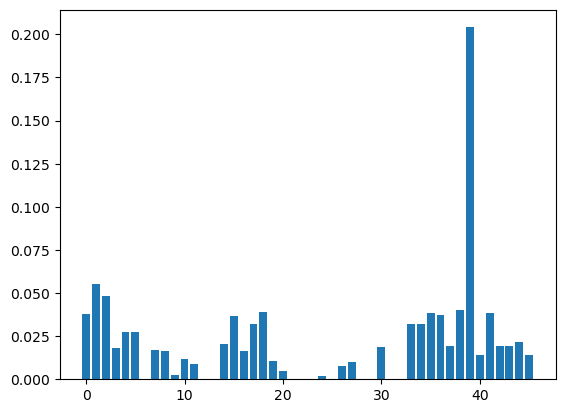

[Accuracy, Recall, Precision, F1 Score]

[0.9218126610881615, 0.8860850130904245, 0.8484213270237904, 0.8591662028661655]


In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_random_forest_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
print(importances_random_forest_df.sort_values(by='Importance', ascending=False))

plt.bar(range(len(rf_feature_importances)), rf_feature_importances)
plt.show()

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_metrics = get_perf_metrics(rf_y_pred, y_test)

print("[Accuracy, Recall, Precision, F1 Score]")
print(rf_metrics)

#### 6.1.2 Logistic Regression

In order to make Logistic regression model training we use the following code wich trains a Logistic Regression model using the training data (X_train and y_train), and analyzes the coefficients of each feature, displays a bar chart of feature coefficients, makes predictions on the test set (X_test), and calculates performance metrics such as accuracy, recall, precision, and F1 score.

            Feature  Coefficient

44         Variance     0.662692

0     flow_duration     0.581361

11  ack_flag_number     0.560805

43       Covariance     0.525436

16        fin_count    -0.462584

34              Min     0.401456

41         Magnitue     0.333939

17        urg_count     0.328757

19             HTTP     0.321412

35              Max     0.318719

33          Tot sum     0.310783

8   syn_flag_number    -0.299520

1     Header_Length    -0.265783

20            HTTPS     0.263235

27              UDP     0.256138

26              TCP    -0.247344

37              Std    -0.235483

42           Radius    -0.229548

2     Protocol Type    -0.216214

9   rst_flag_number    -0.181551

3          Duration     0.174076

14        ack_count     0.128459

24              SSH    -0.102231

5             Srate    -0.089352

4              Rate    -0.089352

10  psh_flag_number    -0.087369

15        syn_count    -0.080688

18        rst_count     0.063186

45           W

D:\Users\ZY LAPTOP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


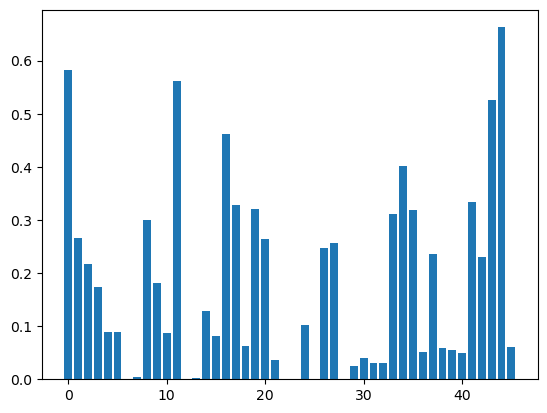

[Accuracy, Recall, Precision, F1 Score]

[0.6207146135649472, 0.5675031090595928, 0.5285966697419757, 0.5121260925315075]


D:\Users\ZY LAPTOP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Get feature coefficients
feature_coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature coefficients
lr_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_coefficients})
lr_importances_df.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False, inplace=True)
print(lr_importances_df)

feature_coefficients_abs = np.abs(feature_coefficients)
plt.bar(range(len(feature_coefficients)), feature_coefficients_abs)
plt.show()

# Make predictions on the test set
lr_y_pred = logreg_model.predict(X_test)

# Calculate performance metrics
lr_metrics = get_perf_metrics(lr_y_pred, y_test)

print("[Accuracy, Recall, Precision, F1 Score]")
print(lr_metrics)

### 6.2 Modelling of 8 classes(Random Forest Classifier & Logistic Regression)

            Feature  Importance

39              IAT    0.191122

1     Header_Length    0.058809

41         Magnitue    0.057039

18        rst_count    0.055458

0     flow_duration    0.048060

36              AVG    0.045230

2     Protocol Type    0.043162

35              Max    0.043097

38         Tot size    0.042800

17        urg_count    0.038501

34              Min    0.036444

33          Tot sum    0.032822

44         Variance    0.031392

5             Srate    0.030950

4              Rate    0.029516

42           Radius    0.025744

43       Covariance    0.024114

15        syn_count    0.023997

37              Std    0.023048

3          Duration    0.022451

40           Number    0.014221

45           Weight    0.013113

16        fin_count    0.012905

20            HTTPS    0.008515

14        ack_count    0.008252

24              SSH    0.007055

26              TCP    0.006302

11  ack_flag_number    0.005713

27              UDP    0.004261

30        

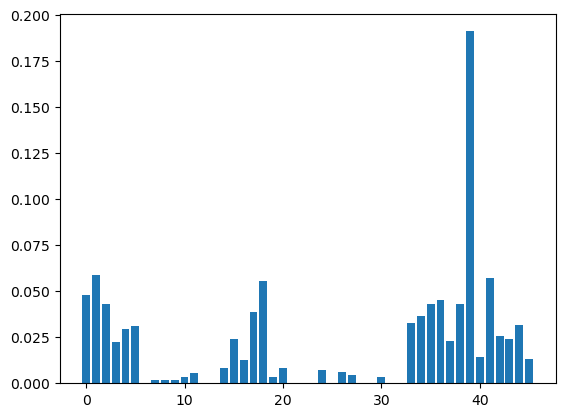

[Accuracy, Recall, Precision, F1 Score]

[0.8972624798711756, 0.8978961018022291, 0.8939440510722263, 0.8941469149233847]


In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_random_forest_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
print(importances_random_forest_df.sort_values(by='Importance', ascending=False))

plt.bar(range(len(rf_feature_importances)), rf_feature_importances)
plt.show()

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_metrics = get_perf_metrics(rf_y_pred, y_test)

print("[Accuracy, Recall, Precision, F1 Score]")
print(rf_metrics)

            Feature  Coefficient

0     flow_duration    -2.401205

18        rst_count     2.242490

1     Header_Length    -1.620223

44         Variance     0.868246

11  ack_flag_number     0.596120

35              Max     0.430164

24              SSH    -0.411653

16        fin_count    -0.380562

42           Radius    -0.320929

10  psh_flag_number    -0.314162

37              Std    -0.294871

15        syn_count    -0.286915

7   fin_flag_number     0.274838

2     Protocol Type     0.262137

19             HTTP    -0.234286

43       Covariance     0.218822

30             ICMP     0.193977

41         Magnitue    -0.193865

14        ack_count     0.141480

20            HTTPS     0.139340

9   rst_flag_number    -0.139019

34              Min     0.127377

3          Duration     0.106862

8   syn_flag_number    -0.090218

36              AVG     0.083989

26              TCP    -0.054942

40           Number    -0.051352

33          Tot sum     0.051348

38         Tot

D:\Users\ZY LAPTOP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


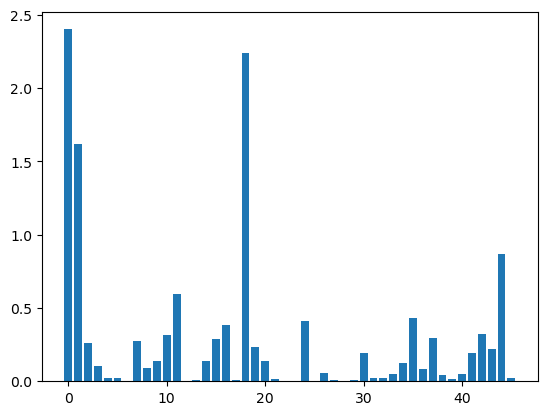

[Accuracy, Recall, Precision, F1 Score]

[0.6639613526570048, 0.6690772088903785, 0.6544331604414921, 0.6516580925747336]


In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Get feature coefficients
feature_coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature coefficients
lr_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_coefficients})
lr_importances_df.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False, inplace=True)
print(lr_importances_df)

feature_coefficients_abs = np.abs(feature_coefficients)
plt.bar(range(len(feature_coefficients)), feature_coefficients_abs)
plt.show()

# Make predictions on the test set
lr_y_pred = logreg_model.predict(X_test)

# Calculate performance metrics
lr_metrics = get_perf_metrics(lr_y_pred, y_test)

print("[Accuracy, Recall, Precision, F1 Score]")
print(lr_metrics)

### 7 Conclusion
In conclusion, the Secure IoT Network project is crucial in enhancing the resilience of IoT ecosystems against increasing cybersecurity threats. Through careful attention to data preparation and augmentation and all steps of data preprocessing (Datad cleaning ,features enfenering..), the project seeks to increase the effectiveness of machine learning models. Precisely designed for the complex IoT environment, these models play a pivotal role in early detection and mitigation of cyber threats.